In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

from pmlb import fetch_data, classification_dataset_names
from scipy import stats

import random as rd
import math

import plotly

import warnings
warnings.filterwarnings('ignore')

import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
meta = np.load("meta.npy")
#num_precent,sample_num,feature_num,class_num,bin_multi,imbalance
bin_index = np.array(np.where(meta[:,4]==0)[0],dtype=np.int)
multi_index = np.where(meta[:,4]==1)[0]
bin_meta = meta[bin_index,:]
multi_meta = meta[multi_index,:]

small_index = np.array(np.where(meta[:,1]<1000)[0])
large_index = np.array(np.where(meta[:,1]>5000)[0])

balance_index = np.array(np.where(meta[:,5]<=0.5)[0])
inbalance_index = np.array(np.where(meta[:,5]>0.6)[0])

In [3]:
bv3 = np.load("lgbbv3.npy")
bv4 = np.load("lgbbv4.npy")
bv5 = np.load("lgbbv5.npy")
bv6 = np.load("lgbbv6.npy")
bv7 = np.load("lgbbv7.npy")

In [4]:
c1 = np.repeat(0.6,9)
c2 = np.repeat([0.1,0.15,0.2],3)
c3 = np.tile([0.1,0.15,0.2],3)
size_set = np.column_stack((c1,c2,c3))
numsize = size_set.shape[0]
size_set

array([[0.6 , 0.1 , 0.1 ],
       [0.6 , 0.1 , 0.15],
       [0.6 , 0.1 , 0.2 ],
       [0.6 , 0.15, 0.1 ],
       [0.6 , 0.15, 0.15],
       [0.6 , 0.15, 0.2 ],
       [0.6 , 0.2 , 0.1 ],
       [0.6 , 0.2 , 0.15],
       [0.6 , 0.2 , 0.2 ]])

In [5]:
bv3.shape

(9, 166, 3, 6)

In [6]:
bv = np.array([bv3,bv4,bv5,bv6,bv7])

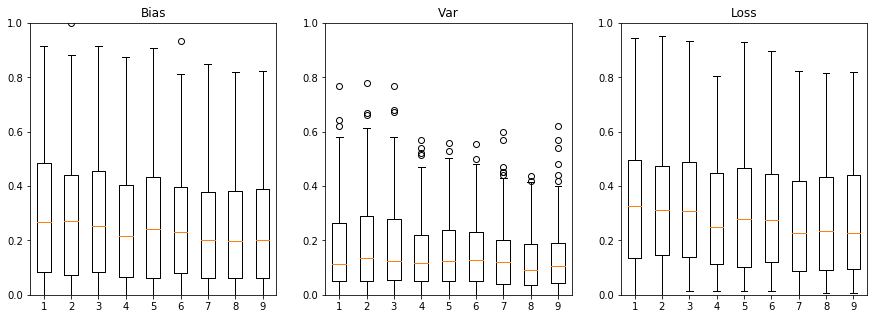

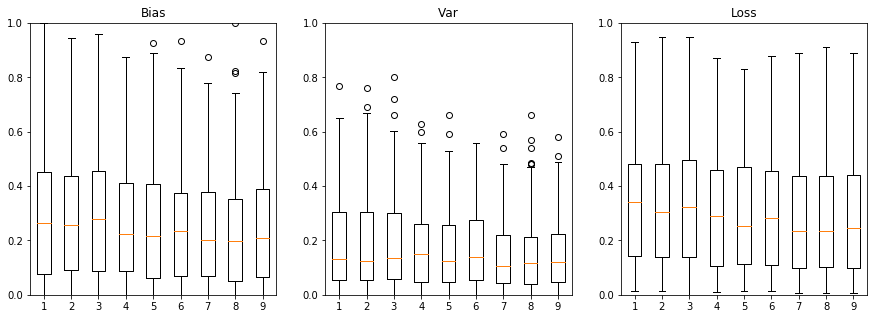

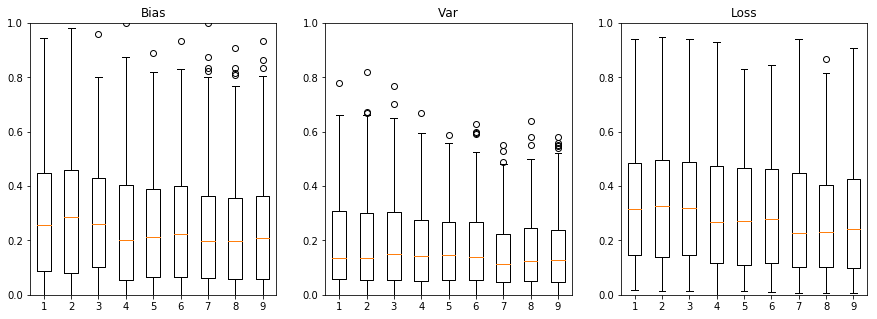

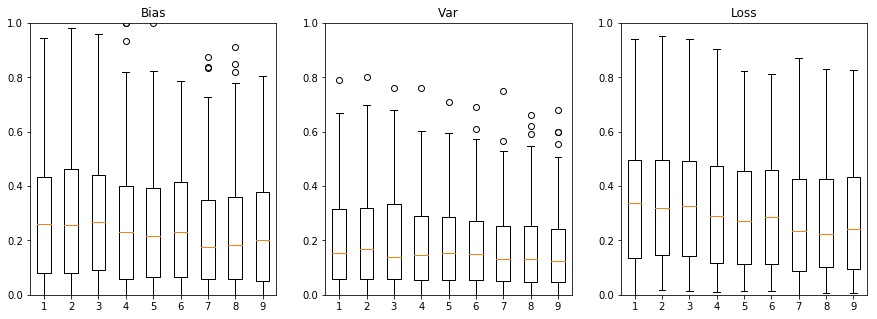

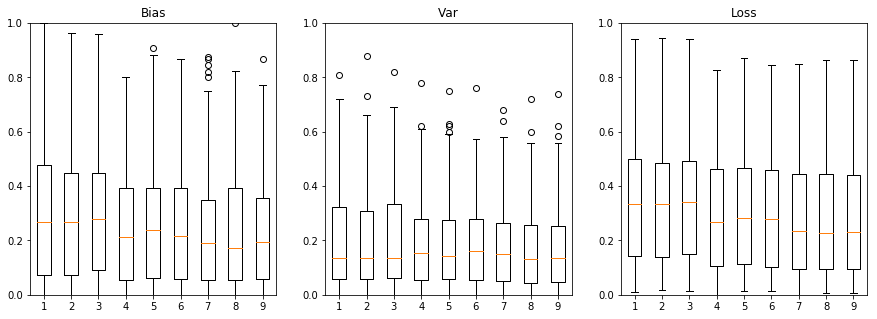

In [7]:
#bias & var & err
for i in range(0,5) :
    plt.figure(figsize=[15,5])
    test_bias = np.transpose(bv[i,:,:,0,0])
    plt.subplot(131)
    plt.boxplot(test_bias)
    plt.title("Bias")
    plt.ylim([0,1])
    test_var = np.transpose(bv[i,:,:,0,1])
    plt.subplot(132)
    plt.boxplot(test_var)
    plt.title("Var")
    plt.ylim([0,1])
    test_loss = np.transpose(bv[i,:,:,0,4])
    plt.subplot(133)
    plt.boxplot(test_loss)
    plt.title("Loss")
    plt.ylim([0,1])
    plt.show()    

In [8]:
# May not have significance difference 
## ANOVA set to zero constraint !! F statistic !!

In [9]:
bv = np.array([bv3,bv4,bv5,bv6,bv7])
bias = bv[:,:,:,1,0]
var = bv[:,:,:,1,1]
loss = bv[:,:,:,1,4]

In [10]:
temp_bias = np.concatenate(bias)
temp_var = np.concatenate(var)
temp_loss = np.concatenate(loss)
#3 range 9 times
#4 range 9 times
#etc.
out_bias = np.concatenate(temp_bias)
out_var = np.concatenate(temp_var)
out_loss = np.concatenate(temp_loss)
##range 1st case 1--166
## 2nd case 1--166



In [11]:
row = np.tile(range(0,166),45) ##0 --165 *45 times
col = np.repeat(range(0,45),166)  ## 0*166 ,1*166, ... , 44*166
pd_bias = pd.DataFrame(np.transpose([out_bias,row,col]),columns = ["value","row","col"])
pd_var = pd.DataFrame(np.transpose([out_var,row,col]),columns = ["value","row","col"])
pd_loss = pd.DataFrame(np.transpose([out_loss,row,col]),columns = ["value","row","col"])

In [14]:
formula = "value ~ C(row) + C(col)"
print("Bias")
res = anova_lm(ols(formula,pd_bias).fit())
print(res)
print("\n"+"Var")
res = anova_lm(ols(formula,pd_var).fit())
print(res)
print("\n"+"Loss")
res = anova_lm(ols(formula,pd_loss).fit())
print(res)

Bias
              df      sum_sq   mean_sq           F        PR(>F)
C(row)     165.0  314.319522  1.904967  294.751556  0.000000e+00
C(col)      44.0    3.937276  0.089484   13.845601  5.550158e-96
Residual  7260.0   46.921072  0.006463         NaN           NaN

Var
              df      sum_sq   mean_sq           F         PR(>F)
C(row)     165.0  140.746849  0.853011  203.184164   0.000000e+00
C(col)      44.0    2.688272  0.061097   14.553103  8.651300e-102
Residual  7260.0   30.479055  0.004198         NaN            NaN

Loss
              df      sum_sq   mean_sq           F         PR(>F)
C(row)     165.0  296.203446  1.795172  566.654262   0.000000e+00
C(col)      44.0    3.752446  0.085283   26.919924  8.314663e-202
Residual  7260.0   22.999830  0.003168         NaN            NaN
